# Import Necessary Dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data-sets/amazon_reviews.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
df = df.dropna()

feedback
1    2893
0     256
Name: count, dtype: int64


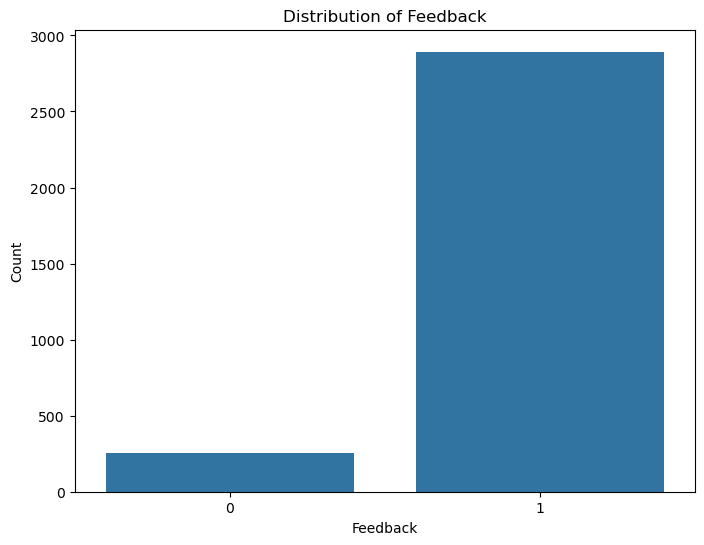

In [6]:
label_counts = df['feedback'].value_counts()
print(label_counts)

#plot the label counts
plt.figure(figsize=(8,6))
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [7]:
positive_reviews = df[df['feedback'] == 1]
positive_sentences = positive_reviews['verified_reviews'].tolist()
positive_sentences_as_one_string = ' '.join(map(str, positive_sentences))

print(positive_sentences_as_one_string)

Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I've purchased. I'm working on get

(-0.5, 399.5, 199.5, -0.5)

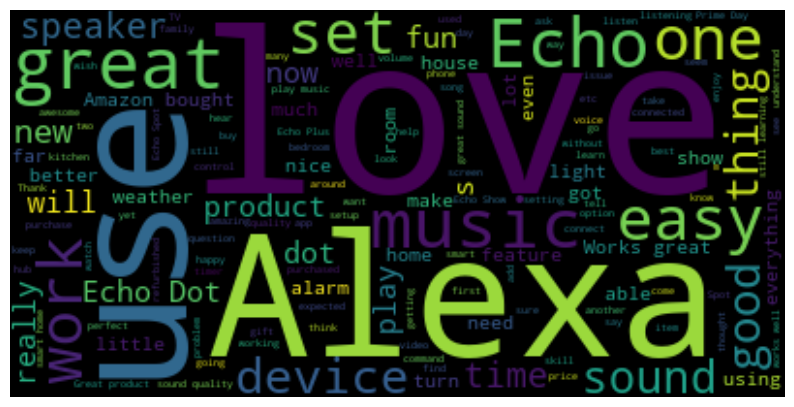

In [8]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate(positive_sentences_as_one_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')



In [9]:
negative_reviews = df[df['feedback'] == 0]
negative_sentences = negative_reviews['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(map(str, negative_sentences))

print(negative_sentences_as_one_string)


It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it for that either. She randomly s

(-0.5, 399.5, 199.5, -0.5)

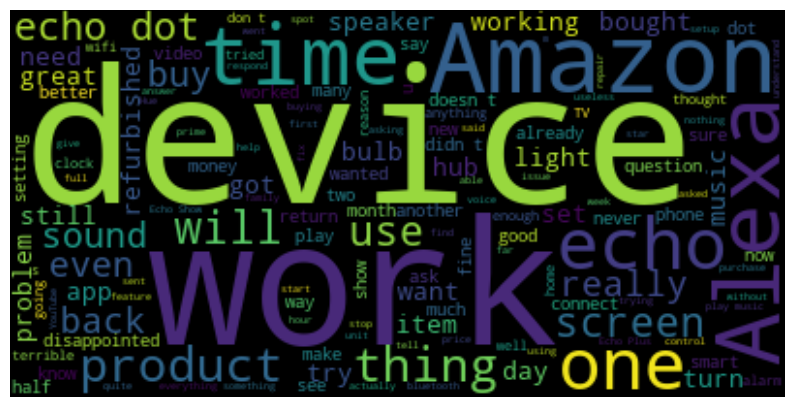

In [10]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate(negative_sentences_as_one_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')



In [11]:
def clean_text(text):
    if isinstance(text, str): 
        cleaned_text = ''.join(char if char.isalpha() or char.isspace() else '' for char in text)
        cleaned_text = cleaned_text.lower()
        return cleaned_text.strip()
    else:
        return text 
    
df['verified_reviews'] = df['verified_reviews'].astype(str).apply(clean_text)

# Print cleaned column
print(df['verified_reviews'].head())


0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my  yr...
4                                                music
Name: verified_reviews, dtype: object


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['verified_reviews'])

#Use get_fature_names_out() instead of get_feature_names()
print(vectorizer.get_feature_names_out())

['abay' 'abc' 'abd' ... 'zzzz' 'zzzzzzz' 'útil']


In [13]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
X.shape

(3149, 4322)

In [15]:
X = pd.DataFrame(X.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3149, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape,y_train.shape)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


(2519, 4322) (2519,)


LogisticRegression()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.49        63
           1       0.93      0.98      0.96       567

    accuracy                           0.92       630
   macro avg       0.82      0.68      0.73       630
weighted avg       0.91      0.92      0.91       630



[[ 24  39]
 [ 10 557]]


<Axes: >

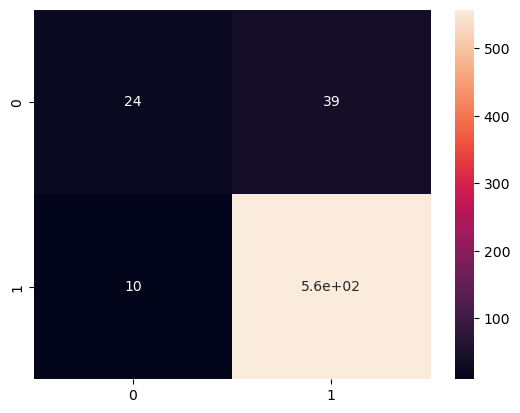

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)